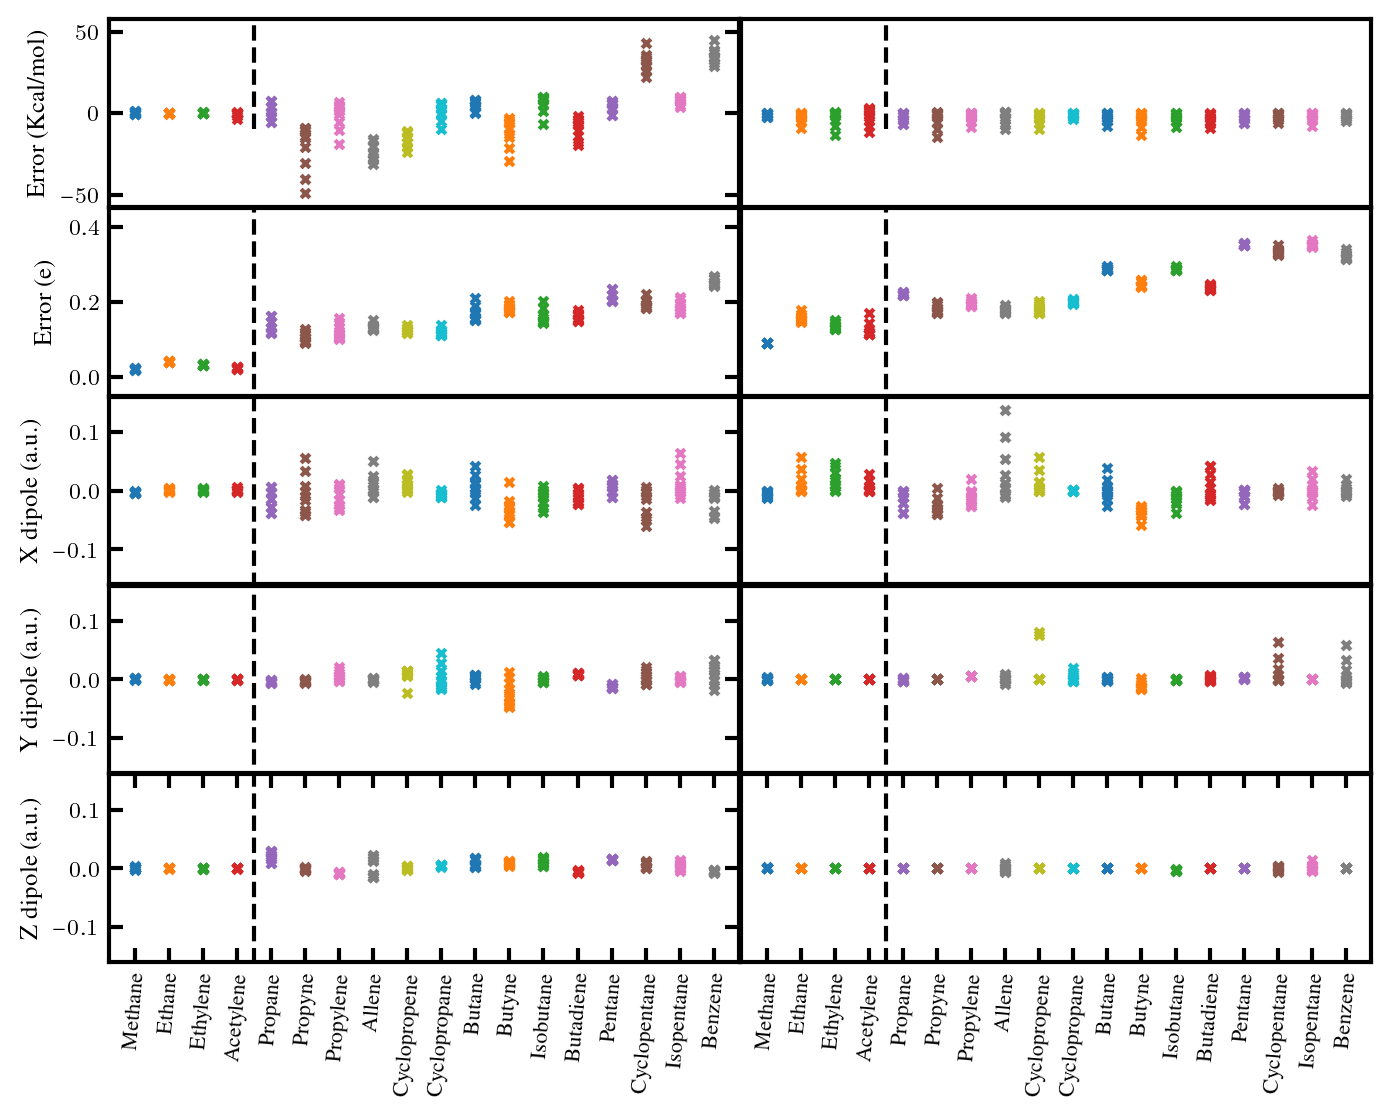

<Figure size 686.111x541.667 with 0 Axes>

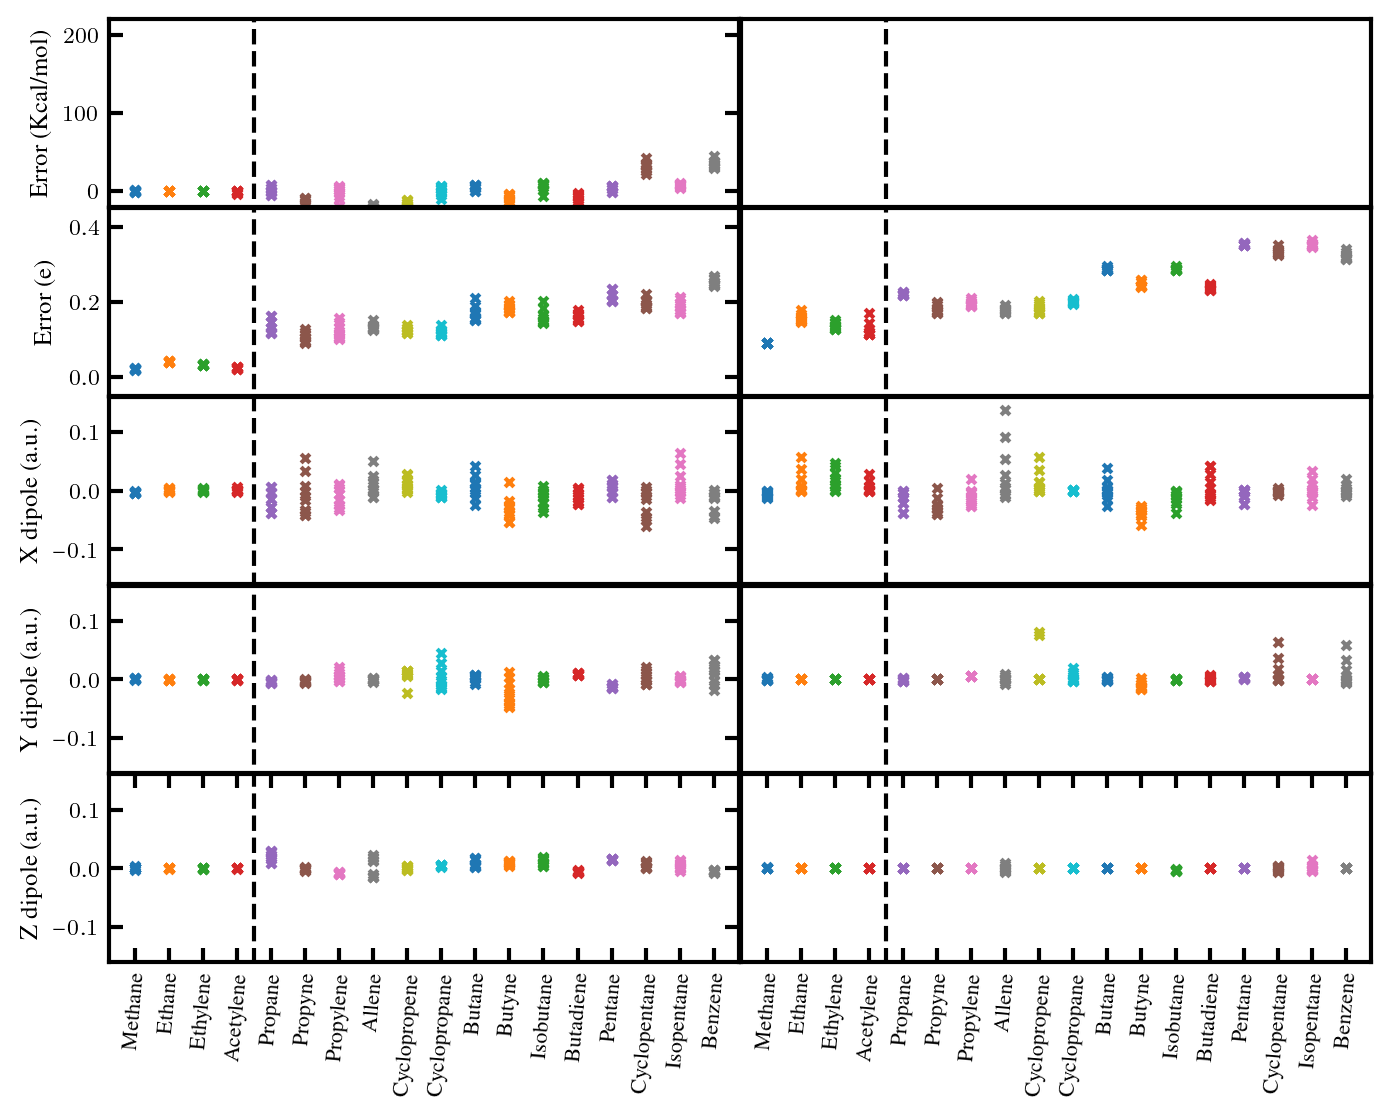

<Figure size 686.111x541.667 with 0 Axes>

In [8]:
from pathlib import Path
import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

TRAIN_STR_DICT = [
    "methane",
    "ethane",
    "ethylene",
    "acetylene",
]
EVAL_STR_DICT = [
    "propane",
    "propyne",
    "propylene",
    "allene",
    "cyclopropene",
    "cyclopropane",
    "butane",
    "butyne",
    "isobutane",
    "butadiene",
    "pentane",
    "cyclopentane",
    "isopentane",
    "benzene",
]
from matplotlib import rcParams
from matplotlib import rc


rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})
rc("text", usetex=True)
rc("font", family="serif")

rcParams["text.latex.preamble"] = thesis_latex

fontsize = 10.045
sca_size = 2
plt.rc("font", size=fontsize)  # controls default text size
plt.rc("axes", titlesize=fontsize)  # fontsize of the title
plt.rc("axes", labelsize=fontsize - 1)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=fontsize - 2)  # fontsize of the x tick labels
plt.rc("ytick", labelsize=fontsize - 2)  # fontsize of the y tick labels
plt.rc("legend", fontsize=fontsize)  # fontsize of the legend

rcParams["axes.linewidth"] = 1.5
rcParams["lines.linewidth"] = 1.5
rcParams["xtick.major.width"] = 3
rcParams["xtick.minor.size"] = 5
rcParams["xtick.major.size"] = 5
rcParams["ytick.minor.size"] = 5
rcParams["ytick.major.size"] = 5
rcParams["xtick.minor.width"] = 1.5
rcParams["xtick.major.width"] = 1.5
rcParams["ytick.minor.width"] = 1.5
rcParams["ytick.major.width"] = 1.5

plt.rcParams["figure.figsize"] = np.array([0.95, 0.75]) * 520 / 72

model_number = "ccdft_2024-07-13-18-43-51_64_4_0"

for shift in [True, False]:
    f, axes = plt.subplots(5, 2)
    axes = axes.reshape(5, 2)

    begin_y = 0.125
    end_y = 0.995
    int_y = 0.00125
    begin_x = 0.075
    end_x = 0.995
    int_x = 0.00125
    end_x += int_x
    end_y += int_y

    shapexy = np.shape(axes)
    inter_x = np.linspace(begin_x, end_x, shapexy[1] + 1)
    inter_y = np.linspace(begin_y, end_y, shapexy[0] + 1)

    delta_x = inter_x[1] - inter_x[0] - int_x
    delta_y = inter_y[1] - inter_y[0] - int_y

    for i in range(shapexy[0]):
        for j in range(shapexy[1]):
            axes[i][j].set_position(
                [
                    inter_x[j],
                    inter_y[i],
                    inter_x[j + 1] - inter_x[j] - int_x,
                    inter_y[i + 1] - inter_y[i] - int_y,
                ]
            )
            axes[i][j].xaxis.set_tick_params(
                direction="in", which="both", bottom=True, top=True
            )
            axes[i][j].yaxis.set_tick_params(
                direction="in", which="both", left=True, right=True
            )

    axes = axes[::-1, :]

    load_name = f"../validate/{model_number}"
    load_path = Path(f"{load_name}")

    data = pd.read_csv(load_path)
    data_dft = pd.read_csv(f"../validate/tz_dft")
    # data_dft = pd.read_csv(f"../validate/dz_dft")

    loss_scf_ene_l, loss_dft_ene_l, loss_scf_rho_l, loss_dft_rho_l = [], [], [], []
    loss_scf_dipole_x_l, loss_dft_dipole_x_l = [], []
    loss_scf_dipole_y_l, loss_dft_dipole_y_l = [], []
    loss_scf_dipole_z_l, loss_dft_dipole_z_l = [], []
    number_draw = 0

    for dict_ in [TRAIN_STR_DICT, EVAL_STR_DICT]:
        for i_name in dict_:
            data_tmp = data.loc[data["name"].str.match(i_name)]
            data_eq1 = data_dft.loc[data_dft["name"].str.match(i_name)]
            data_eq = data_eq1.loc[data_eq1["name"].str.contains(f"0_1_0.0000")]

            data_loss_scf_ene = data_tmp["error_scf_ene"]
            data_loss_dft_ene = data_tmp["error_dft_ene"]
            if shift:
                data_loss_dft_ene = data_loss_dft_ene - np.mean(
                    data_eq["error_dft_ene"]
                )
            data_loss_dft_ene = data_loss_dft_ene

            data_loss_scf_rho = data_tmp["error_scf_rho_r"]
            data_loss_dft_rho = data_tmp["error_dft_rho_r"]

            data_loss_scf_dipole_x = data_tmp["dipole_x_diff_scf"]
            data_loss_dft_dipole_x = data_tmp["dipole_x_diff_dft"]
            data_loss_scf_dipole_y = data_tmp["dipole_y_diff_scf"]
            data_loss_dft_dipole_y = data_tmp["dipole_y_diff_dft"]
            data_loss_scf_dipole_z = data_tmp["dipole_z_diff_scf"]
            data_loss_dft_dipole_z = data_tmp["dipole_z_diff_dft"]

            loss_scf_ene_l.append(data_loss_scf_ene.mean())
            loss_dft_ene_l.append(data_loss_dft_ene.mean())
            loss_scf_rho_l.append(data_loss_scf_rho.mean())
            loss_dft_rho_l.append(data_loss_dft_rho.mean())
            loss_scf_dipole_x_l.append(data_loss_scf_dipole_x.mean())
            loss_dft_dipole_x_l.append(data_loss_dft_dipole_x.mean())
            loss_scf_dipole_y_l.append(data_loss_scf_dipole_y.mean())
            loss_dft_dipole_y_l.append(data_loss_dft_dipole_y.mean())
            loss_scf_dipole_z_l.append(data_loss_scf_dipole_z.mean())
            loss_dft_dipole_z_l.append(data_loss_dft_dipole_z.mean())

            name_list = data_tmp["name"].values
            for i in range(len(name_list)):
                name_list[i] = float(name_list[i].split("_")[-1])

            axes[0, 0].scatter(
                np.zeros_like(data_loss_scf_ene) + number_draw,
                data_loss_scf_ene,
                s=10,
                marker="x",
            )
            axes[1, 0].scatter(
                np.zeros_like(data_loss_scf_rho) + number_draw,
                data_loss_scf_rho,
                s=10,
                marker="x",
            )
            axes[2, 0].scatter(
                np.zeros_like(data_loss_scf_dipole_x) + number_draw,
                data_loss_scf_dipole_x,
                s=10,
                marker="x",
            )
            axes[3, 0].scatter(
                np.zeros_like(data_loss_scf_dipole_y) + number_draw,
                data_loss_scf_dipole_y,
                s=10,
                marker="x",
            )
            axes[4, 0].scatter(
                np.zeros_like(data_loss_scf_dipole_z) + number_draw,
                data_loss_scf_dipole_z,
                s=10,
                marker="x",
            )

            axes[0, 1].scatter(
                np.zeros_like(data_loss_dft_ene) + number_draw,
                data_loss_dft_ene,
                s=10,
                marker="x",
            )
            axes[1, 1].scatter(
                np.zeros_like(data_loss_dft_rho) + number_draw,
                data_loss_dft_rho,
                s=10,
                marker="x",
            )
            axes[2, 1].scatter(
                np.zeros_like(data_loss_dft_dipole_x) + number_draw,
                data_loss_dft_dipole_x,
                s=10,
                marker="x",
            )
            axes[3, 1].scatter(
                np.zeros_like(data_loss_dft_dipole_y) + number_draw,
                data_loss_dft_dipole_y,
                s=10,
                marker="x",
            )
            axes[4, 1].scatter(
                np.zeros_like(data_loss_dft_dipole_z) + number_draw,
                data_loss_dft_dipole_z,
                s=10,
                marker="x",
            )
            number_draw += 1

    for i_row in range(axes.shape[0]):
        for i_col in range(axes.shape[1]):
            axes[i_row, i_col].vlines(
                len(TRAIN_STR_DICT) - 0.5, -10, 1000, colors="k", linestyles="--"
            )

    # axes[0, 0].hlines(1, -1.5, 100 - 1.5, "r")
    # axes[0, 0].hlines(5, -1.5, 100 - 1.5, "r", linestyle="--")
    # axes[0, 0].hlines(50, -1.5, 100 - 1.5, "r", linestyle="--")
    # axes[0, 0].plot(
    #     range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), loss_scf_ene_l, "b"
    # )
    # axes[1, 0].plot(
    #     range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), loss_scf_rho_l, "b"
    # )
    # axes[0, 1].plot(
    #     range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), loss_dft_ene_l, "b"
    # )
    # axes[1, 1].plot(
    #     range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), loss_dft_rho_l, "b"
    # )

    for i_row in range(axes.shape[0]):
        for i_col in range(axes.shape[1]):
            axes[i_row, i_col].set_xticks([])
            axes[i_row, -1].set_yticks([])
            axes[-1, i_col].set_xticks(
                range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
                [i.title() for i in (TRAIN_STR_DICT + EVAL_STR_DICT)],
                rotation=85,
            )
            axes[i_row, i_col].set_xlim(
                -0.75, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.25
            )

    axes[0, 0].set_ylabel("Error (Kcal/mol)")
    axes[1, 0].set_ylabel("Error (e)")
    axes[2, 0].set_ylabel("X dipole (a.u.)")
    axes[3, 0].set_ylabel("Y dipole (a.u.)")
    axes[4, 0].set_ylabel("Z dipole (a.u.)")
    for i_col in range(2):
        if shift:
            axes[0, i_col].set_ylim(-57.5, 57.5)
        else:
            axes[0, i_col].set_ylim(-20, 220)
        axes[1, i_col].set_ylim(-0.05, 0.45)
        axes[2, i_col].set_ylim(-0.16, 0.16)
        axes[3, i_col].set_ylim(-0.16, 0.16)
        axes[4, i_col].set_ylim(-0.16, 0.16)

    # axes[0, 1].set_ylim(-15, 150)
    # axes[0, 1].set_ylabel("Error (mHa)")
    # axes[1, 1].set_ylim(-50, 550)
    # axes[1, 1].set_ylabel("Error (me)")shift

    if shift:
        plt.savefig(f"../manu/figures/{model_number}.pdf")
    else:
        plt.savefig(f"../manu/figures/{model_number}-no_shift.pdf")
    plt.show()
    plt.clf()

In [12]:
# 249150 * 241**2 * 8 / 1024**3
# 241**4 * 8 / 1024**3
# 249150 / 241**2

4.289698868821129

In [30]:
print(f"{111.3774:0.2g}")

1.1e+02


In [5]:
data_tmp = data.loc[data["name"].str.match("pentane")]
data_eq = data_tmp.loc[data_tmp["name"].str.contains(f"0_1_0.0000")]

data_loss_scf_ene = np.abs(data_tmp["error_scf_ene"])
data_loss_dft_ene = data_tmp["error_dft_ene"] - np.mean(
    data_tmp["error_dft_ene"]
)
data_loss_dft_ene = np.abs(data_loss_dft_ene)

In [3]:
data_loss_scf_ene

50     4.681044
51    10.297631
52    15.150055
53    17.307086
54    17.074415
55    17.073513
56    17.304690
57    15.150457
58    10.292622
59     4.694251
Name: error_scf_ene, dtype: float64